In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_rows',100)

In [ ]:
df = pd.read_csv('/content/CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [ ]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [ ]:
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [ ]:
df = df.drop(['Make', 'Model', 'Vehicle Class','Transmission'],axis=1)

In [ ]:
df.shape

(7385, 8)

In [ ]:
from scipy.stats import zscore
z_score=np.abs(zscore(df[['Engine Size(L)', 'Cylinders','Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']]))
outlier = np.where(z_score>3)[0]
df = df.drop(outlier)

In [ ]:
df.shape

(7047, 8)

In [ ]:
df.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,Z,9.9,6.7,8.5,33,196
1,2.4,4,Z,11.2,7.7,9.6,29,221
2,1.5,4,Z,6.0,5.8,5.9,48,136
3,3.5,6,Z,12.7,9.1,11.1,25,255
4,3.5,6,Z,12.1,8.7,10.6,27,244


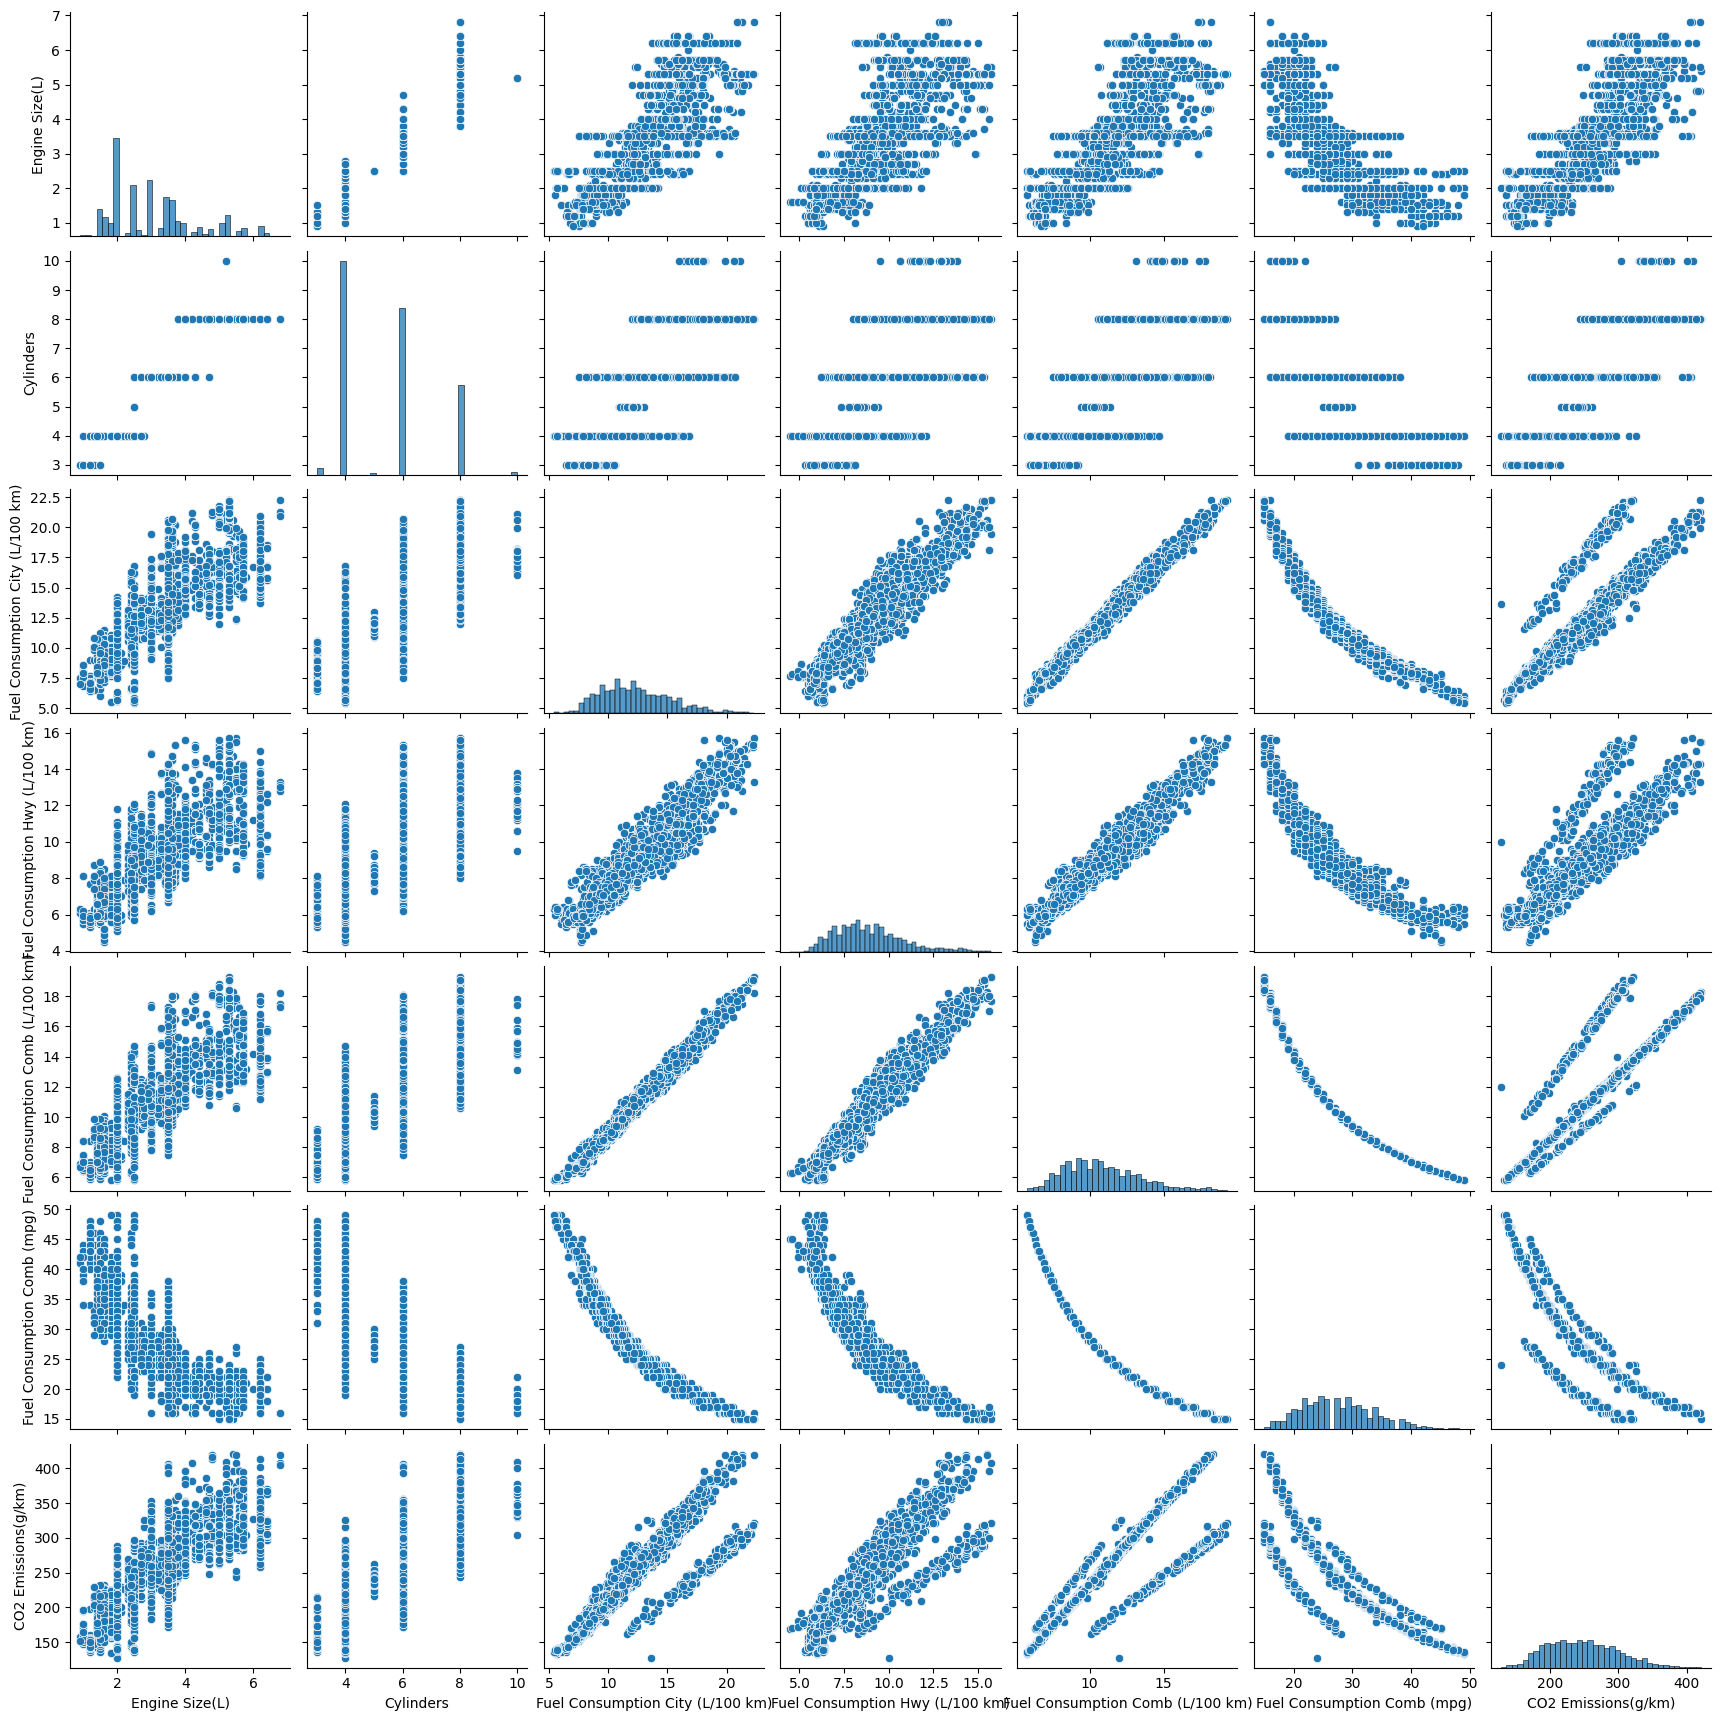

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb = LabelEncoder()
df['Fuel Type'] = lb.fit_transform(df['Fuel Type'])

In [ ]:
df.head()
lb.classes_

array(['D', 'E', 'N', 'X', 'Z'], dtype=object)

<Axes: >

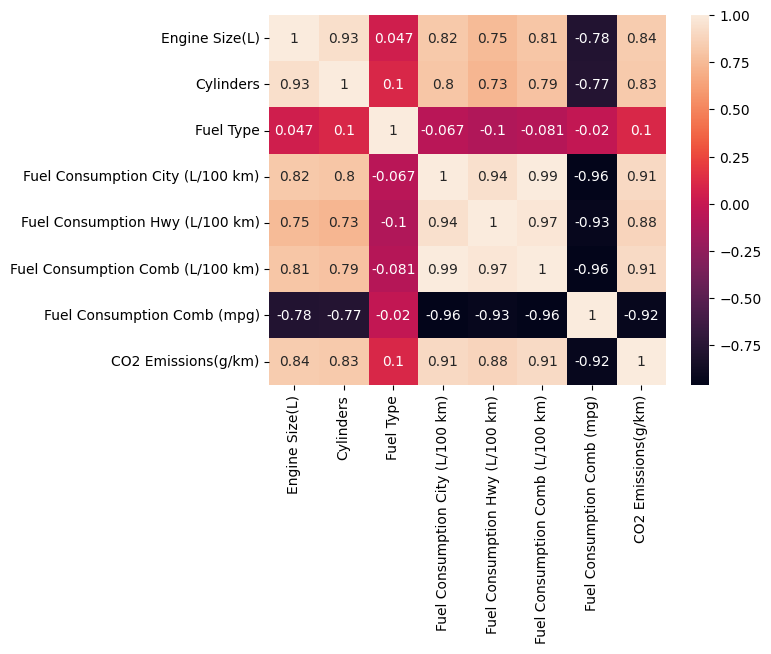

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df = df.drop(['Fuel Type'],axis=1)

<Axes: >

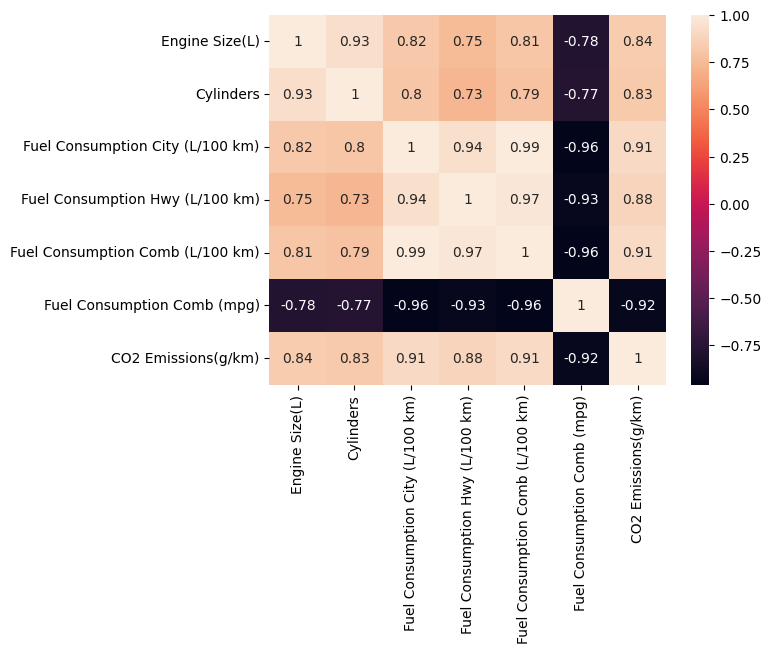

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [ ]:
df.shape

(7047, 7)

In [ ]:
df = df.loc[~df.duplicated()]

In [ ]:
df.shape

(4147, 7)

In [ ]:
df.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [ ]:
x = df.drop(['CO2 Emissions(g/km)'],axis=1)
y = df['CO2 Emissions(g/km)']

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
x = Normalizer().fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [ ]:
knnr = KNeighborsRegressor(5)
knnr.fit(xtrain,ytrain)
ypred = knnr.predict(xtest)
print(mean_absolute_error(ypred,ytest))

4.882409638554217


In [ ]:
print(r2_score(ypred,ytest))

0.9526012284445711


In [ ]:
print(mean_squared_error(ypred,ytest))

121.09706024096386


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(xtrain,ytrain)
rfr_ypred=rfr.predict(xtest)
print(r2_score(rfr_ypred,ytest))

0.9595146670533515


In [ ]:
print(mean_absolute_error(rfr_ypred,ytest))

4.7943243736852175


In [ ]:
print(mean_squared_error(rfr_ypred,ytest))

105.29725371033118
